In [33]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import keras
#import tensorflow as tf
import pandas as pd

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
x_train = x_train / 255
x_test = x_test / 255

In [36]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [37]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [38]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8584 - loss: 0.4581 - val_accuracy: 0.9819 - val_loss: 0.0599
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9752 - loss: 0.0856 - val_accuracy: 0.9874 - val_loss: 0.0431
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9893 - val_loss: 0.0372
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9847 - loss: 0.0513 - val_accuracy: 0.9887 - val_loss: 0.0372
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9904 - val_loss: 0.0352
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9915 - val_loss: 0.0335
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9921 -

### Accuracy и loss для тестовой выборки

In [42]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0253


[0.021213987842202187, 0.9930999875068665]

### Accuracy по эпохам обучения для тренировочной и валидационной выборок

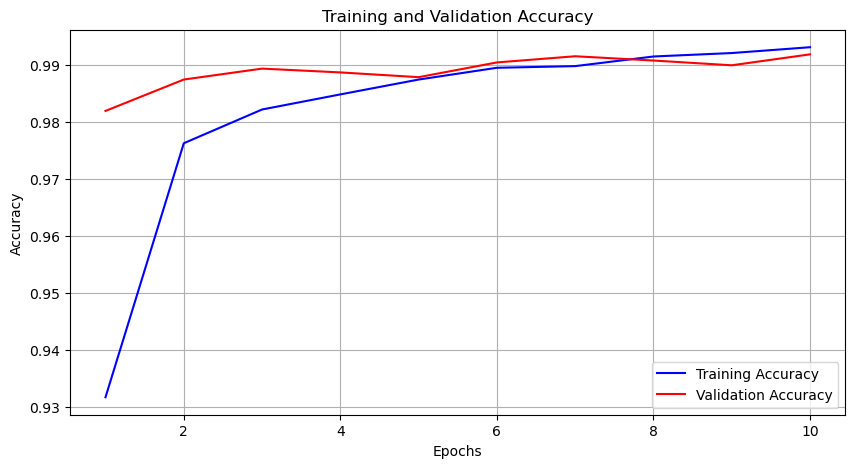

In [49]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

### Предсказание для случайного числа из тестовой выборки

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[2.1202901e-12 5.9242701e-11 7.9085757e-12 1.4509369e-09 9.7581233e-07
  2.7595548e-10 2.5466702e-15 1.2760381e-07 5.3351084e-08 9.9999881e-01]]
9


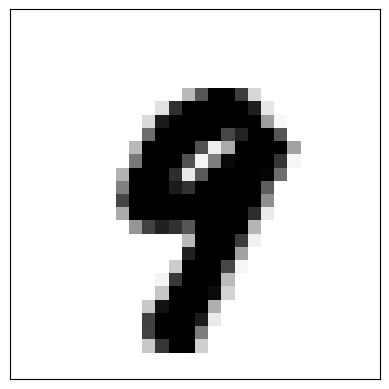

In [43]:
n = np.random.randint(0, 10000)
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))
plt.xticks([])
plt.yticks([])

plt.imshow(x_test[n], cmap=plt.cm.binary);



In [44]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [45]:
pred_df = pd.DataFrame()
pred_df['Prediction'] = pred
pred_df['y'] = y_test

In [46]:
wrong_pred = pred_df[pred_df['Prediction'] != pred_df['y']]

### Первые 25 неправильных предсказаний из тестовой выборки

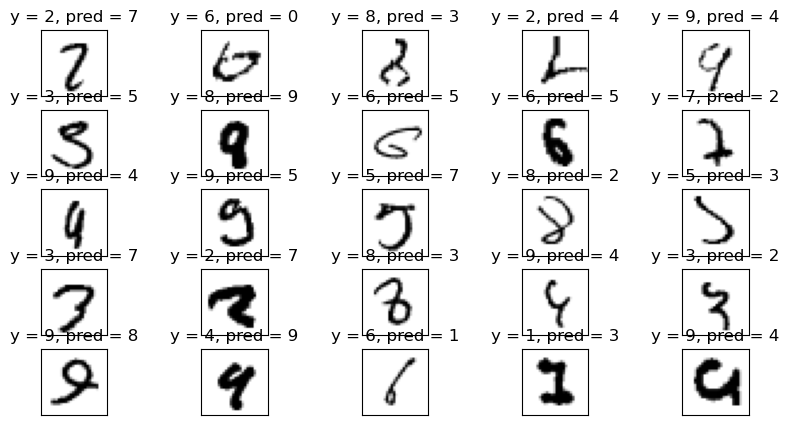

In [47]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'y = {wrong_pred.iloc[i]['y']}, pred = {wrong_pred.iloc[i]['Prediction']}')
    plt.imshow(x_test[wrong_pred.index[i]], cmap=plt.cm.binary)

In [48]:
model.save('mnist_CNN.keras')